In [35]:
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp

In [30]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [13]:
%cd ../Solubility/

/Users/pwalters/DATA/ACID_BASE/Solubility


In [2]:
df = pd.read_csv("AZ_Solubility.csv")

In [3]:
df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units
0,OC(=O)c1cc2cc(Cl)ccc2n1Cc3ccc(Cl)c(Cl)c3,217385,NaN,81300.0,nM
1,COc1cc(OC2CNC2)ccc1Nc3ncc(Cl)c(n3)c4cnc5ccccn45,1166753,NaN,81300.0,nM
2,CCOC(=O)Nc1ccc2Sc3ccccc3N(C(=O)CCN4CCOCC4)c2c1,139866,NaN,83200.0,nM
3,Nc1nc(cs1)c2ccc(Cl)cc2,1061805,NaN,83200.0,nM
4,CC(C)c1ccc2[nH]c3CCN(Cc3c2c1)C(=O)[C@@H]4CCCC[C@H]4C(=O)NC5(CC5)C#N,1428120,NaN,83200.0,nM


In [4]:
chg_df = pd.read_csv("AZ_Solubility_charge.csv")

In [5]:
chg_df.head()

,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,217385,4.76,NaN,acidic,acidic,acidic
1,1166753,13.54,8.60,basic,basic,basic
2,139866,12.90,6.73,basic,neutral,neutral
3,1061805,16.70,4.07,neutral,neutral,neutral
4,1428120,11.93,-0.35,neutral,neutral,neutral


In [17]:
combo_df = df.merge(chg_df,left_on="molregno",right_on="NAME")
combo_df["Sol_uM"] = combo_df.standard_value/1000

In [18]:
combo_df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90,Sol_uM
0,OC(=O)c1cc2cc(Cl)ccc2n1Cc3ccc(Cl)c(Cl)c3,217385,NaN,81300.0,nM,217385,4.76,NaN,acidic,acidic,acidic,81.3
1,COc1cc(OC2CNC2)ccc1Nc3ncc(Cl)c(n3)c4cnc5ccccn45,1166753,NaN,81300.0,nM,1166753,13.54,8.60,basic,basic,basic,81.3
2,CCOC(=O)Nc1ccc2Sc3ccccc3N(C(=O)CCN4CCOCC4)c2c1,139866,NaN,83200.0,nM,139866,12.90,6.73,basic,neutral,neutral,83.2
3,Nc1nc(cs1)c2ccc(Cl)cc2,1061805,NaN,83200.0,nM,1061805,16.70,4.07,neutral,neutral,neutral,83.2
4,CC(C)c1ccc2[nH]c3CCN(Cc3c2c1)C(=O)[C@@H]4CCCC[C@H]4C(=O)NC5(CC5)C#N,1428120,NaN,83200.0,nM,1428120,11.93,-0.35,neutral,neutral,neutral,83.2


In [14]:
ab_order = ["acidic","basic","neutral","zwiterionic"]
ab_pal = ["pink","lightblue","lightgreen","violet"]

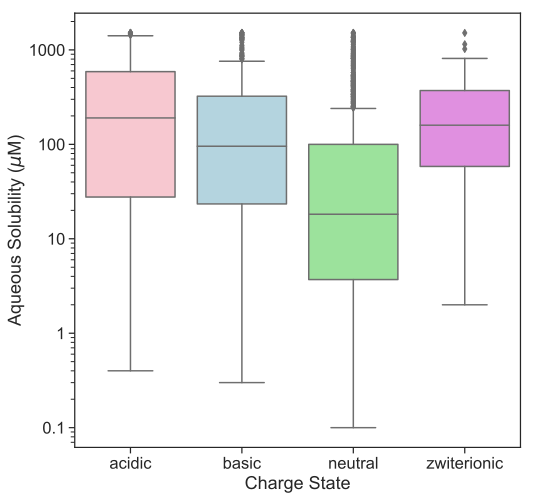

In [33]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.boxplot(x="STATE_50",y="Sol_uM",data=combo_df,order=ab_order,palette=ab_pal)
ax.set(xlabel="Charge State",ylabel="Aqueous Solubility ($\mu$M)")
ax.set(yscale="log")
ax.set_yticks([0.1,1,10,100,1000])
_ = ax.set_yticklabels(["0.1","1","10","100","1000"])

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Charge State')]

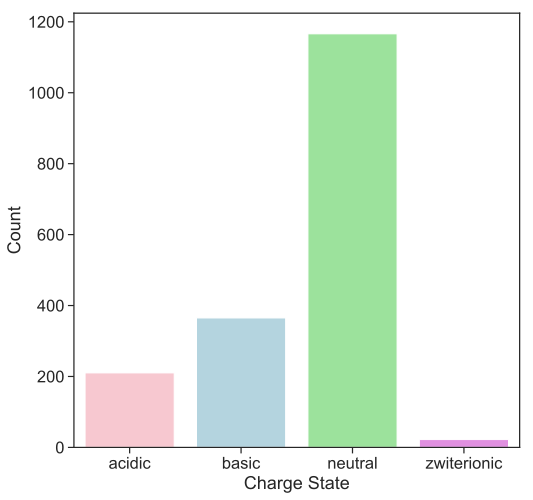

In [34]:
ax = sns.countplot(combo_df.STATE_50,order=ab_order,palette=ab_pal)
ax.set(xlabel="Charge State", ylabel="Count")


In [11]:
combo_df.shape

(1763, 11)

(<matplotlib.axes._subplots.AxesSubplot at 0x117613780>,
 <matplotlib.colorbar.ColorbarBase at 0x11691e1d0>)

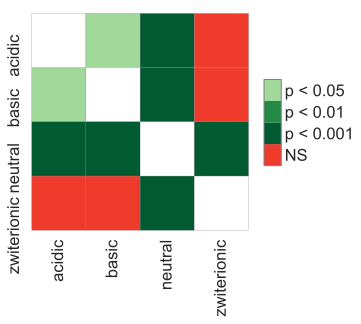

In [36]:
sns.set(rc={'figure.figsize':(6,4)},font_scale=1.5)
pc = sp.posthoc_mannwhitney(combo_df,val_col="Sol_uM",group_col="STATE_50",p_adjust='holm')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

[Text(0, 0.5, 'Fraction'), Text(0.5, 0, 'Aqueous Solubility ($\\mu$M)')]

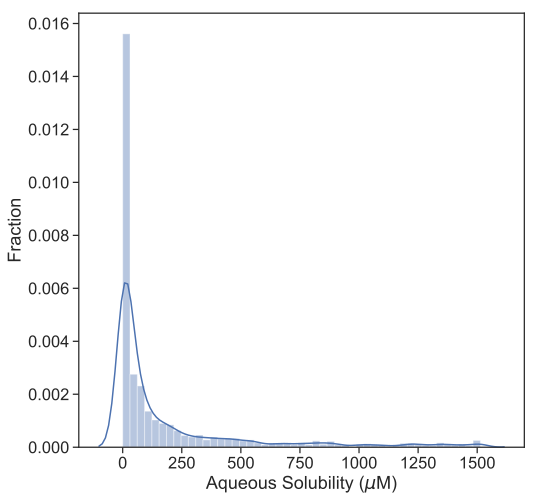

In [44]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.distplot(combo_df.Sol_uM)
ax.set(xlabel="Aqueous Solubility ($\mu$M)",ylabel="Fraction")